In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('conversion_data.csv')
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [4]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


# EDA

In [5]:
df.groupby('source').mean()

,age,new_user,total_pages_visited,converted
source,,,,
Ads,30.534742,0.685700,4.899538,0.034483
Direct,30.567978,0.686854,4.816901,0.028169
Seo,30.590835,0.684681,4.883946,0.032895


In [6]:
df.groupby('new_user').mean()

,age,total_pages_visited,converted
new_user,,,
0,30.419140,5.280084,0.072002
1,30.639017,4.686155,0.014021


In [7]:
df.groupby('country').mean()

,age,new_user,total_pages_visited,converted
country,,,,
China,30.672972,0.698520,4.553523,0.001332
Germany,30.449985,0.677237,5.190717,0.062500
UK,30.451538,0.679835,5.082167,0.052632
US,30.566482,0.681985,4.930160,0.037801


In [8]:
df.groupby('converted').mean()

,age,new_user,total_pages_visited
converted,,,
0,30.703961,0.698382,4.550281
1,26.546765,0.297941,14.553529


In [9]:
# convert to categorical data type
for col in ['country','new_user','source','converted']:
    df[col] = df[col].astype('category')

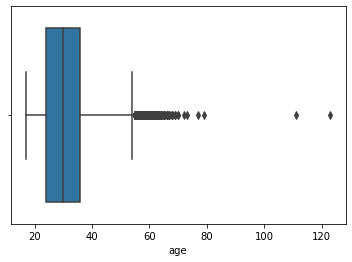

In [10]:
# EDA: boxplot of age
sns.boxplot(df['age'])

In [11]:
# remove outliers
df = df[df['age']<90]

,country,age,new_user,source,total_pages_visited,converted
54,US,25,1,Direct,18,1
87,US,18,0,Direct,19,1
130,US,17,0,Ads,19,1
213,US,17,0,Seo,21,1
229,US,35,0,Seo,17,1
...,...,...,...,...,...,...
315553,UK,22,0,Seo,17,1
315748,China,26,1,Seo,18,0
316055,US,26,1,Ads,19,1
316087,US,19,1,Ads,19,1


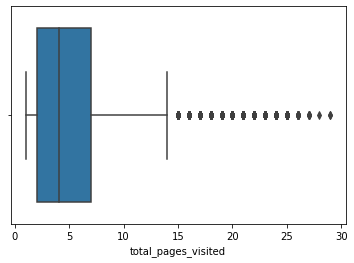

In [12]:
# EDA: boxplot of total_pages_visited
sns.boxplot(df['total_pages_visited'])
df[df['total_pages_visited'] > 15]

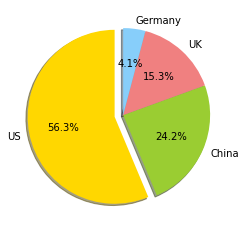

In [13]:
# EDA: percentage of user country
labels = df['country'].value_counts().sort_values(ascending=False).index
sizes = df['country'].value_counts().sort_values(ascending=False)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

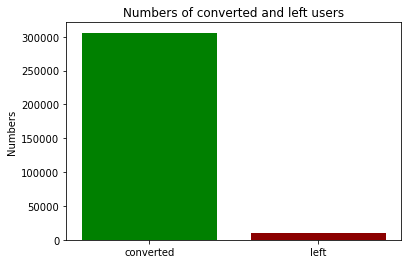

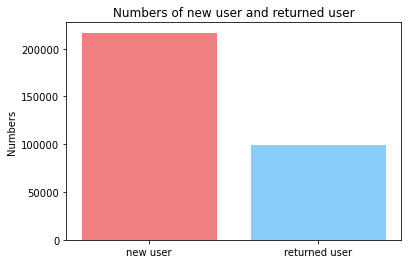

In [14]:
# EDA: data balance - numbers of converted and left users
x = ['converted','left']
x_pos = [i for i, _ in enumerate(x)]
y = df['converted'].value_counts()
plt.bar(x_pos,y, color=['green','darkred'])
plt.ylabel("Numbers")
plt.title("Numbers of converted and left users")
plt.xticks(x_pos, x)
plt.show()

#EDA: numbers of new user and returned user
x = ['new user','returned user']
x_pos = [i for i, _ in enumerate(x)]
y = df['new_user'].value_counts()
plt.bar(x_pos,y,color=['lightcoral', 'lightskyblue'])
plt.ylabel("Numbers")
plt.title("Numbers of new user and returned user")
plt.xticks(x_pos, x)
plt.show()

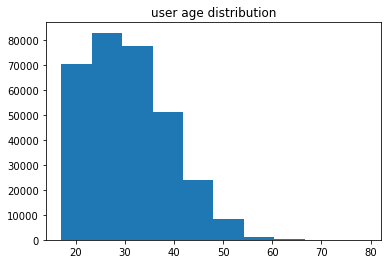

In [15]:
# EDA: histogram of user age distribution
plt.hist(df['age'])
plt.title('user age distribution')
plt.show()

In [16]:
# EDA: percentage of source
source_count = df['source'].value_counts()
pd.DataFrame({'count':source_count,'percentage':source_count/df['source'].count()})

,count,percentage
Seo,155039,0.490323
Ads,88739,0.280644
Direct,72420,0.229034


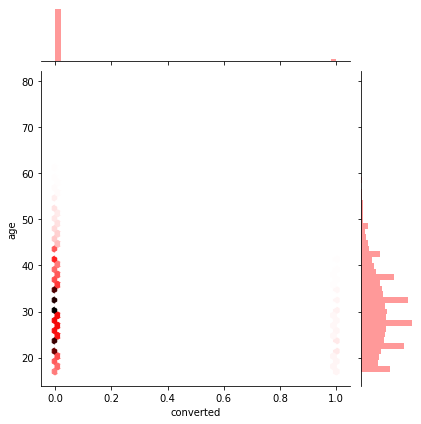

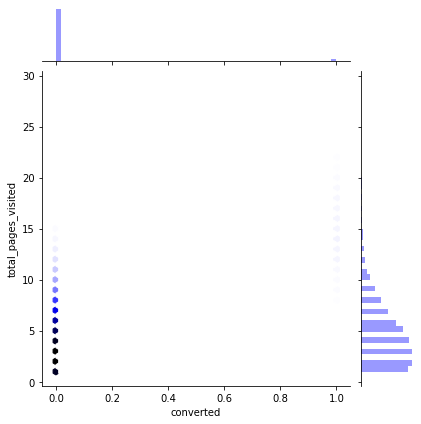

In [17]:
# EDA: density scatter plots of numeric features VS converted
sns.jointplot('converted','age',df,kind="hex",color='r').set_axis_labels('converted','age')
sns.jointplot('converted','total_pages_visited',df,kind="hex",color='b').set_axis_labels('converted','total_pages_visited')


# Predictive Model

In [18]:
# create dummy variables

dummy = pd.get_dummies(df.select_dtypes('category'))
df = df.select_dtypes(exclude='category').merge(dummy,left_index=True, right_index=True)
df = df.drop(columns=['new_user_0', 'converted_0']).rename(columns = {"new_user_1":"new_user","converted_1":"converted"}) 

Hightly unbalanced data regarding to target variable converted

Re-sampling data?

In [19]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
y = df['converted']
X = df.iloc[:,:5]
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=50)
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(trainX, trainy)
pred_y_LR = LR.predict(testX)
print('Accuracy score: '+str(accuracy_score(testy, pred_y_LR)))
prob_y_LR = LR.predict_proba(testX)[:, 1]
print('ROC AUC score: '+str(roc_auc_score(testy, prob_y_LR)))

Accuracy score: 0.9846457938013915
ROC AUC score: 0.9828977643709423


In [20]:
# RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(trainX, trainy)
pred_y_RF = RF.predict(testX)
print('Accuracy score: '+str(accuracy_score(testy, pred_y_RF)))
prob_y_RF = RF.predict_proba(testX)[:, 1]
print('ROC AUC score: '+str(roc_auc_score(testy, prob_y_RF)))

Accuracy score: 0.9839658444022771
ROC AUC score: 0.9702963411853467
